## How good is your model?

In [48]:
# Initiate environment
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = os.path.abspath(os.getcwd())

churn_df = pandas.read_csv(os.path.join(BASE_DIR, "week1/dataset/train.csv"))
churn_df['churn'] = churn_df['churn'].map(dict(yes=1, no=0))
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(y)

[0 0 0 ... 0 0 0]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))

[[1407   34]
 [ 178   81]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1441
           1       0.70      0.31      0.43       259

    accuracy                           0.88      1700
   macro avg       0.80      0.64      0.68      1700
weighted avg       0.86      0.88      0.85      1700



#### Note:
meaning of terms:
- precision:
- recall:

## Logistic regression and the ROC curve


In [52]:
# Logistic regression in scikit-learn

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [53]:
# Predicting probabilities
from collections import Counter


y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])
print(y_pred_probs)
print(y_test)
print(Counter(y_test))

0.15839839589690205
[0.1583984  0.11680534 0.07348571 ... 0.05784994 0.32757215 0.04819936]
[0 0 0 ... 0 1 0]
Counter({0: 1091, 1: 184})


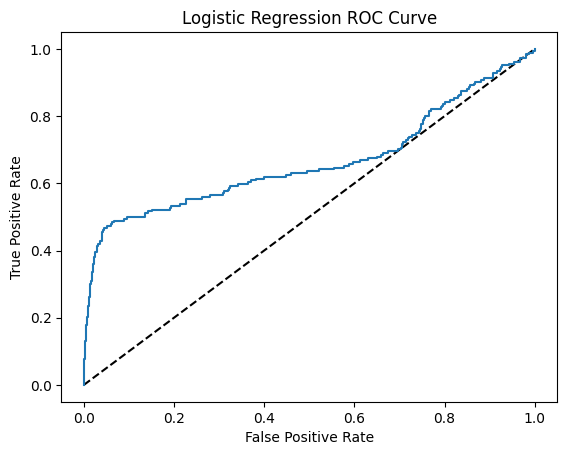

In [54]:
# Plotting the ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, random_state=42)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [55]:
# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))

0.6635266807476189


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
             "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.04700027687498716


In [66]:
# 데이터 수가 많을 수록, 계산해야 하는 대상이 많을 수록 모델이 많아져서 비효율적이 되는 문제를 해결하기 위한 대한
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
             "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.04703725027167267


In [67]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.061724777467908276
